# install requirement
lineplot에서 label 숫자들의 위치를 적절한 간격으로 띄어주는 것에 사용됩니다.

In [13]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7098 sha256=8daa601135d65260d407b91aab069515689116a11b031fa387458c5979eabfa6
  Stored in directory: /Users/jeongjaewon/Library/Caches/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText


# load data
owid-covid-data.csv 
-> 확진자 수가 나라/날짜 등의 기준으로 분류된 dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/owid-covid-data.csv', index_col=2)
df.head()

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,Asia,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
Afghanistan,AFG,Asia,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
Afghanistan,AFG,Asia,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
Afghanistan,AFG,Asia,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
Afghanistan,AFG,Asia,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [3]:
kor = df.index.str.contains('South Korea')
df_kor = df[kor][["date","new_cases"]]
df_kor['new_cases'] = df_kor['new_cases'].fillna(0)
df_kor.head()

,date,new_cases
location,,
South Korea,2020-01-21,0.0
South Korea,2020-01-22,0.0
South Korea,2020-01-23,0.0
South Korea,2020-01-24,1.0
South Korea,2020-01-25,0.0


In [4]:
date_data = df_kor['date']
new_data = df_kor['new_cases']

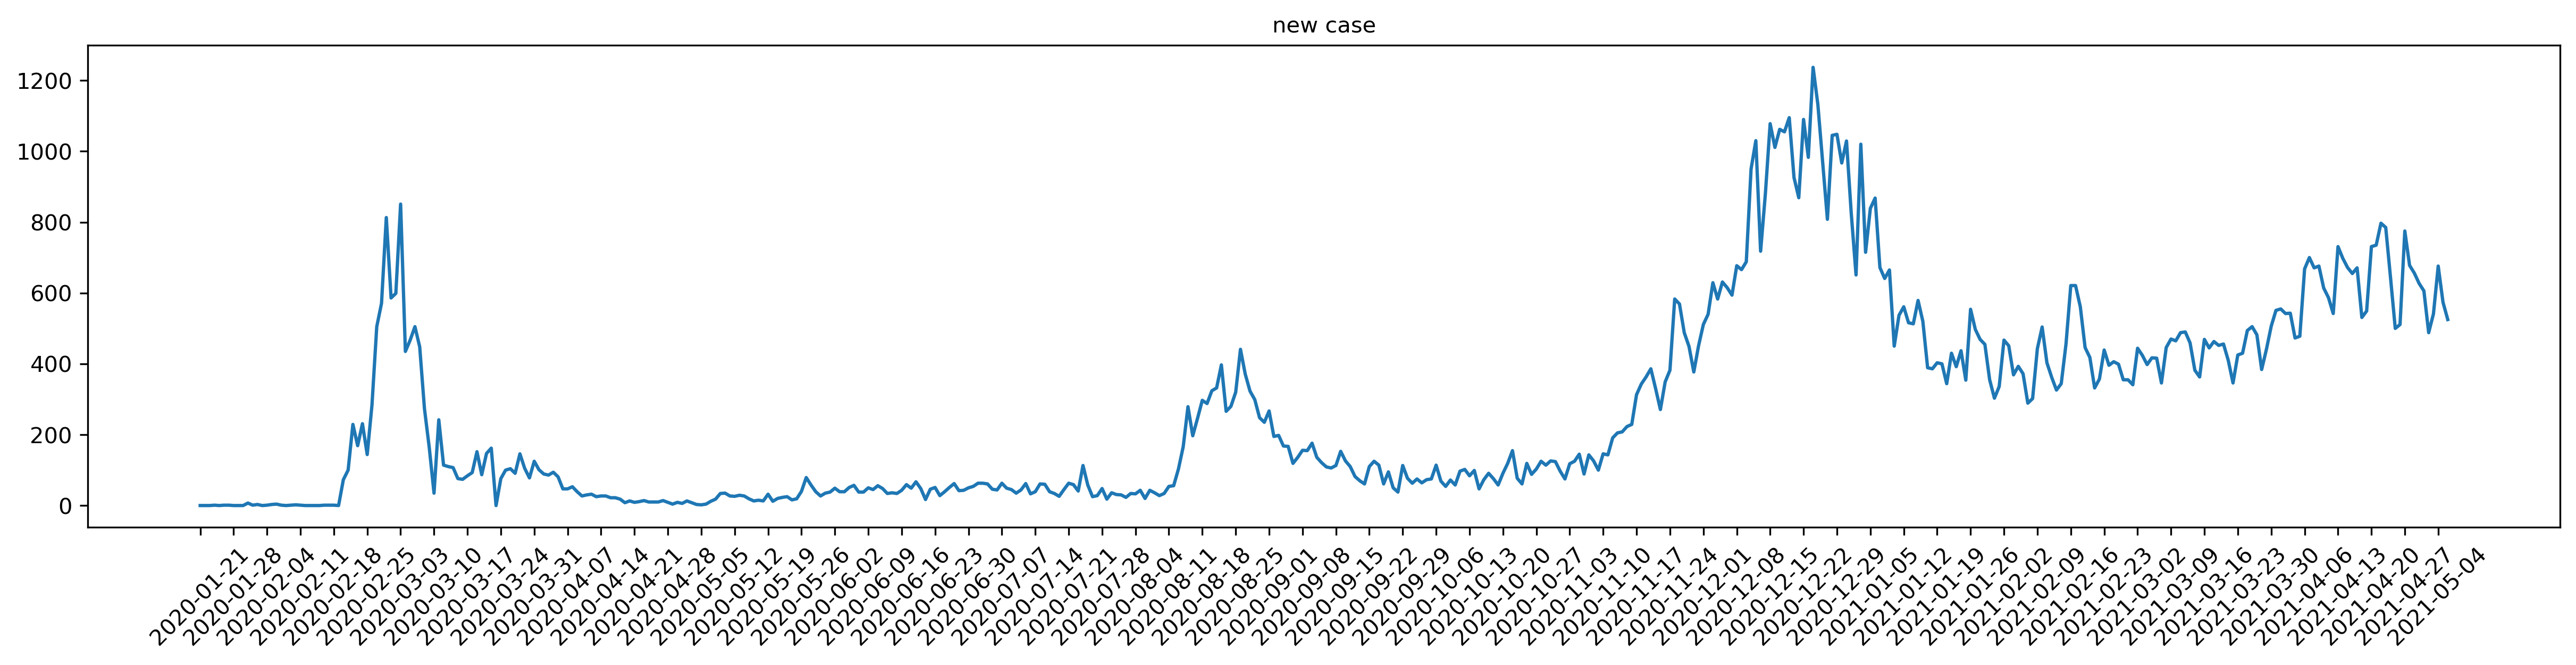

In [5]:
plt.figure(figsize = (20, 4), dpi = 300)
plt.plot(date_data, new_data)
plt.xticks(date_data[::7], rotation=45)
plt.title('new case', fontsize=10)
plt.show()

# Tuning dataset
 * diff()로 미분 -> 미분계수를 통해 날짜별 확진자 증감률 확인
 * rolling()로 이동평균 계산 -> volatile한 그래프를 smoothing 해주고, 사회적 거리두기 연장 기준이 주 단위이기 때문에 값을 7로 정해줌
 
대유행 시점을 고르기 위해 이동평균을 계산한 mov_avg값을 오름차순, 내림차순 정렬 후 15개 정도 뽑아 시각화

증감률이 최대로 차이나는(진폭이 가장 큰) 대유행 시기를 3개 뽑을 수 있음

In [6]:
test = df_kor.copy()

In [7]:
test.date = pd.to_datetime(test.date)
test.new_cases = pd.to_numeric(test.new_cases)
test['new_cases_diff'] = test.new_cases.diff()

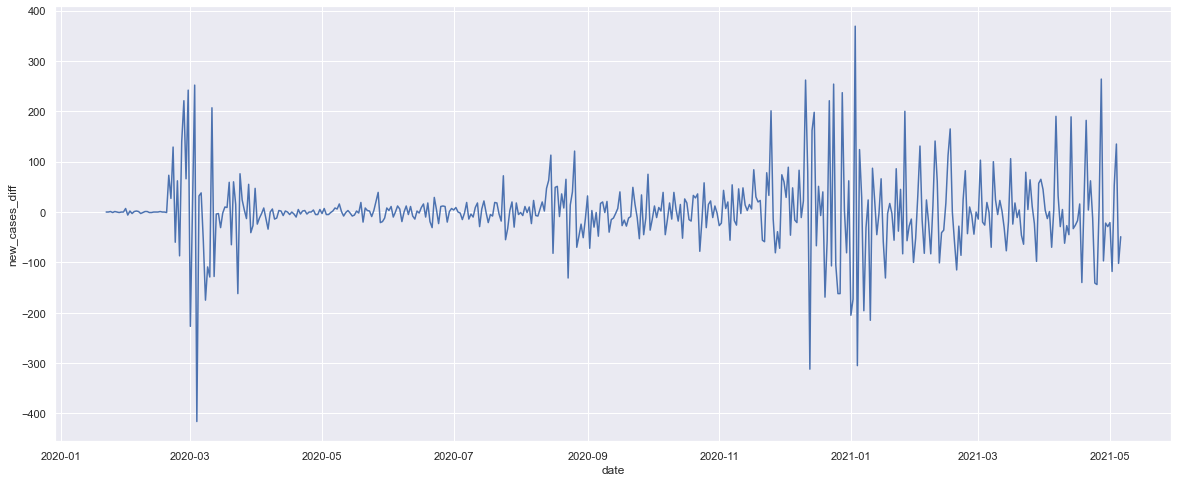

In [8]:
sns.set(rc={'figure.figsize':(20, 8)})
sns.lineplot(
    x='date',
    y='new_cases_diff',
    data= test)
plt.show()

In [9]:
test['mov_avg'] = test['new_cases_diff'].rolling(7).sum()
test.head(15)

,date,new_cases,new_cases_diff,mov_avg
location,,,,
South Korea,2020-01-21,0.0,NaN,NaN
South Korea,2020-01-22,0.0,0.0,NaN
South Korea,2020-01-23,0.0,0.0,NaN
South Korea,2020-01-24,1.0,1.0,NaN
South Korea,2020-01-25,0.0,-1.0,NaN
South Korea,2020-01-26,1.0,1.0,NaN
South Korea,2020-01-27,1.0,0.0,NaN
South Korea,2020-01-28,0.0,-1.0,0.0
South Korea,2020-01-29,0.0,0.0,0.0


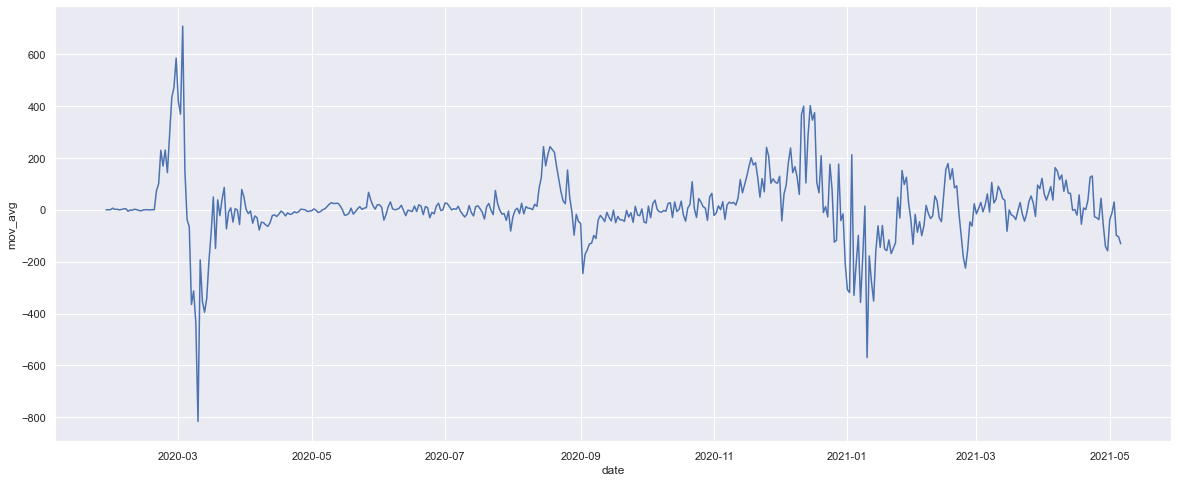

In [10]:
sns.set(rc={'figure.figsize':(20, 8)})
sns.lineplot(
    x='date',
    y='mov_avg',
    data= test)
plt.show()

In [11]:
high_date = test.sort_values(by=['mov_avg'], axis=0, ascending=False).head(15)['date']
high_mov_avg = test.sort_values(by=['mov_avg'], axis=0, ascending=False).head(15)['mov_avg']
low_date = test.sort_values(by=['mov_avg'], axis=0).head(15)['date']
low_mov_avg = test.sort_values(by=['mov_avg'], axis=0).head(15)['mov_avg']

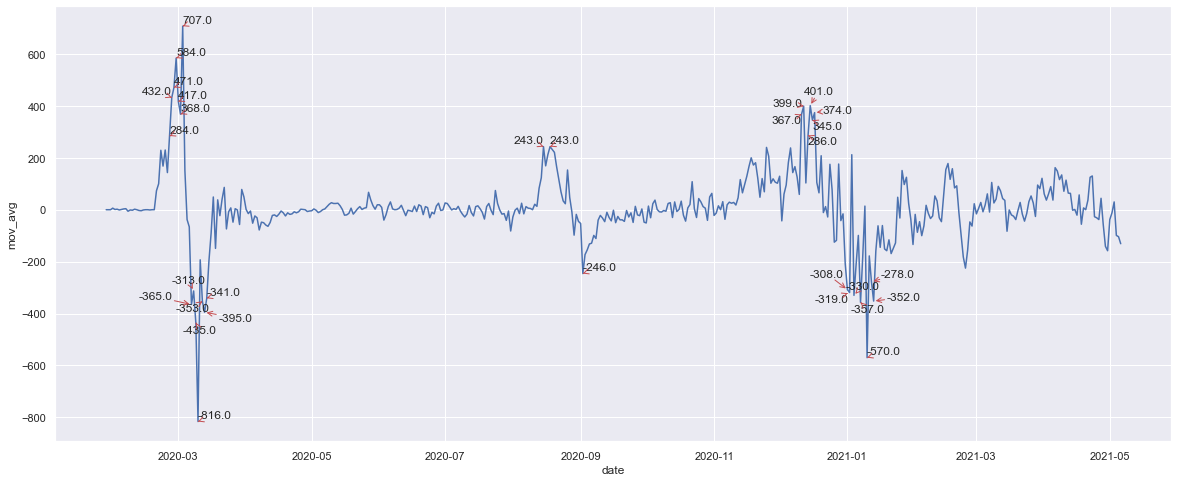

In [14]:
from adjustText import adjust_text

sns.set(rc={'figure.figsize':(20, 8)})
sns.lineplot(
    x='date',
    y='mov_avg',
    data= test)

h_texts = []
for x, y, s in zip(high_date, high_mov_avg, high_mov_avg):
    h_texts.append(plt.text(x, y, s))
l_texts = []
for x, y, s in zip(low_date, low_mov_avg, low_mov_avg):
    l_texts.append(plt.text(x, y, s))
adjust_text(h_texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=1))
adjust_text(l_texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=1))
plt.show()

In [ ]:
# 팀장님 이 그래프 발표 ppt에 넣으실 때 세 구간 박스표시 같은 걸로 정확히 하이라이팅 해주세요